### JP Morgan Volatility Index (VIX)

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset

In [2]:
vix_df = yf.download('^VIX')
vix_df = vix_df.xs('^VIX', axis = 1, level = 'Ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
vix_df['MA'] = vix_df.Close.rolling(30).mean()

In [4]:
vix_df.dropna(inplace = True)

In [5]:
vix_df

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
1990-02-12,24.379999,24.379999,24.379999,24.379999,0,23.606333
1990-02-13,23.760000,23.760000,23.760000,23.760000,0,23.823667
1990-02-14,22.049999,22.049999,22.049999,22.049999,0,23.952333
1990-02-15,19.709999,19.709999,19.709999,19.709999,0,23.968667
1990-02-16,20.780001,20.780001,20.780001,20.780001,0,23.991000
...,...,...,...,...,...,...
2025-03-03,22.780001,24.309999,19.250000,19.830000,0,16.863667
2025-03-04,23.510000,26.350000,21.709999,22.959999,0,17.115000
2025-03-05,21.930000,24.840000,21.370001,23.030001,0,17.344000


In [6]:
vix_filtered = vix_df[vix_df.Close > 1.5 * vix_df.MA]

In [7]:
vix_filtered

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
1990-08-03,28.740000,28.740000,28.740000,28.740000,0,18.581667
1990-08-06,35.910000,35.910000,35.910000,35.910000,0,19.133333
1990-08-07,32.750000,32.750000,32.750000,32.750000,0,19.656333
1990-08-23,36.470001,36.470001,36.470001,36.470001,0,24.036000
1994-04-04,23.870001,28.299999,23.610001,23.610001,0,15.392333
...,...,...,...,...,...,...
2024-08-05,38.570000,65.730003,23.389999,23.389999,0,15.409667
2024-08-06,27.709999,34.770000,24.020000,33.709999,0,15.889000
2024-08-07,27.850000,29.760000,21.969999,24.770000,0,16.389333


In [8]:
#We want to have at least 1 month between triggers
#Here we are checking the date difference between each entry in the filtered dataset 
index_series = pd.Series(vix_filtered.index).diff()
index_series

0           NaT
1        3 days
2        1 days
3       16 days
4     1320 days
         ...   
111      3 days
112      1 days
113      1 days
114    133 days
115      1 days
Name: Date, Length: 116, dtype: timedelta64[ns]

In [9]:
#Converting the values into floating values so we can compare against 30
index_series = index_series / np.timedelta64(1, 'D') >= 30
#Right now the first row is returning false since it had NaT because there was no previous to calculate the difference
#We want to turn this to true since it is first buy function
index_series[0] = True

In [10]:
index_series

0       True
1      False
2      False
3      False
4       True
       ...  
111    False
112    False
113    False
114     True
115    False
Name: Date, Length: 116, dtype: bool

In [11]:
#Screening for just our buying signals
signals = vix_filtered[index_series.values]

signals

Price,Close,High,Low,Open,Volume,MA
Date,,,,,,
1990-08-03,28.740000,28.740000,28.740000,28.740000,0,18.581667
1994-04-04,23.870001,28.299999,23.610001,23.610001,0,15.392333
1997-10-30,38.200001,38.560001,35.840000,36.709999,0,23.125333
1998-08-04,31.059999,31.059999,25.570000,25.570000,0,20.486000
2001-09-17,41.759998,44.330002,39.770000,43.200001,0,23.661333
2006-06-13,23.809999,23.809999,20.270000,20.950001,0,15.577667
2007-02-27,18.309999,19.010000,12.100000,12.120000,0,10.843000
2007-08-15,30.670000,31.760000,26.160000,28.219999,0,20.270667
2008-09-17,36.220001,36.400002,30.250000,31.959999,0,22.627333


In [12]:
sp_500 = yf.download('^GSPC', start = '1990-01-01')
sp_500 = sp_500.xs('^GSPC', axis = 1, level = 'Ticker')
sp_500

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
1990-01-02,359.690002,359.690002,351.980011,353.399994,162070000
1990-01-03,358.760010,360.589996,357.890015,359.690002,192330000
1990-01-04,355.670013,358.760010,352.890015,358.760010,177000000
1990-01-05,352.200012,355.670013,351.350006,355.670013,158530000
1990-01-08,353.790009,354.239990,350.540009,352.200012,140110000
...,...,...,...,...,...
2025-03-03,5849.720215,5986.089844,5810.910156,5968.330078,5613850000
2025-03-04,5778.149902,5865.080078,5732.589844,5811.979980,6138110000
2025-03-05,5842.629883,5860.589844,5742.350098,5781.359863,5285970000


In [13]:
#creates a subset with the conditions of:
#The index date >= first date of our signal and is within 6 months after that date


In [31]:
test = sp_500[(sp_500.index >= signals.index[0]) & (sp_500.index <= signals.index[0] + DateOffset(months = 6))]

test

Price,Close,High,Low,Open,Volume
Date,,,,,
1990-08-03,344.859985,351.480011,338.200012,351.480011,295880000
1990-08-06,334.429993,344.859985,333.269989,344.859985,240400000
1990-08-07,334.829987,338.630005,332.220001,334.429993,231580000
1990-08-08,338.350006,339.209991,334.829987,334.829987,190400000
1990-08-09,339.940002,340.559998,337.559998,338.350006,155810000
...,...,...,...,...,...
1991-01-28,336.029999,337.410004,335.809998,336.059998,141270000
1991-01-29,335.839996,336.029999,334.260010,336.029999,155740000
1991-01-30,340.910004,340.910004,335.709991,335.799988,226790000


In [32]:
#and then from here you would accumulate the percent changes

In [41]:
#calculating returns from the VIX strategy using the same 6 months logic
#making a series of returns
returns = []

for i in range(len(signals)):
    subset = sp_500[(sp_500.index >= signals.index[i]) & (sp_500.index <= signals.index[i] + DateOffset(months = 6))]
    returns.append((subset.Close.pct_change() + 1).prod())

pd.Series(returns)

np.float64(1.061455390085071)

In [43]:
#ouputting mean return
pd.Series(returns).mean()
#was about 6%

np.float64(1.061455390085071)

<Axes: >

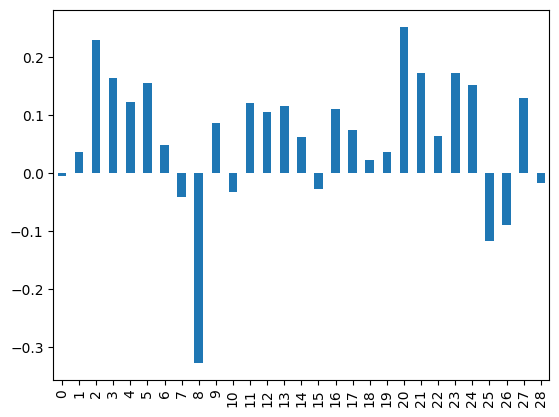

In [44]:
#plotting e/a percent return as a bar chart
(pd.Series(returns) - 1).plot(kind = 'bar')